# EDA : 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해 데이터를 직관적으로 이해하기 위함
- 데이터 자체가 가지고 있는 그대로의 의미를 파악

[ 목적 ]
- 데이터 수집 의사 결정
- 데이터에 맞는 모델 선정
- 변수들 간의 관계 파악

[ 순서 ]
1. 데이터 가져오기 (모듈 세팅)
2. 데이터 정보 확인 (head, tail, describe, info ..)
3. 데이터 전처리 (결측치, 이상치 ..)
4. 데이터 시각화

# outlier.xlsx 실습

## ① 데이터 가져오기 (모듈 세팅)

* 강사님이 보내주신 outlier.xlsx과 weather.csv 파일 넣기

In [1]:
import pandas as pd

In [2]:
out_df = pd.read_excel('/content/outlier.xlsx')
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


## ② 데이터 정보 확인

In [3]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [4]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [5]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [6]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


## ③ 데이터 전처리

In [7]:
# out_df의 index를 '번호'칼럼으로 바꾸기
out_df = out_df.set_index('번호')
# 데이터프레임에 변경을 줄 때는 맨 앞에 변수명 다시 넣기!

In [8]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


* 국어에 -57이라는 이상치 발견

In [9]:
out_df['국어'] = out_df['국어'].replace(-57, 57)
out_df
# 이렇게 바꿔줄 수도 있지만, 하나하나 다 확인해서 바꿀 수 없음

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


### 이상치 확인하기
* 이상치(outlier)
* outlier 엑셀파일의 경우, 점수이기 때문에 0~100점의 범위를 벗어나는게 이상치라는 것을 알고 있지만 기온과 같은 데이터는 이상치를 사람이 판단하기 어려움
* **사분위에서 특정 범위(+IQR * 1.5 / -IQR * 1.5)를 초과하는 경우**

In [10]:
import matplotlib.pyplot as plt

* 이상치를 확인할 때는 matplotlib의 boxplot을 많이 사용함

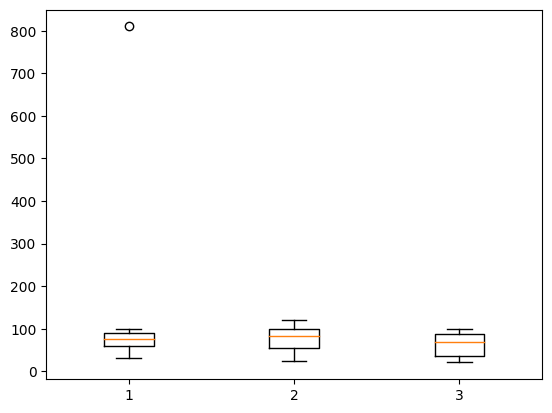

In [11]:
plt.boxplot(out_df)
plt.show()
# 첫번째 컬럼값 맨 위에 혼자 동그라미 -> 이상치

In [12]:
# 810점의 이상치를 일단 81점으로 바꾸고 그래프 다시 그려보기
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


## ④ 데이터 시각화

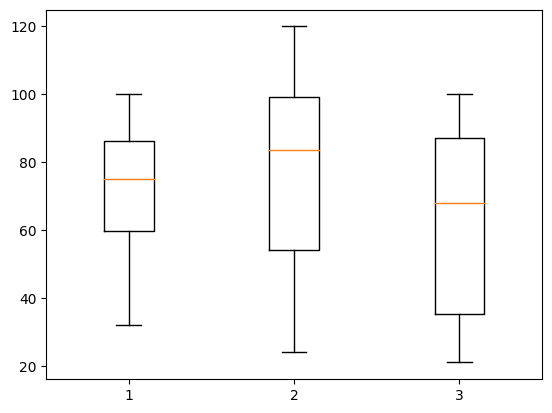

In [13]:
# 이전과 다른 그래프를 확인할 수 있음
plt.boxplot(out_df)
plt.show()

* out_df로 표현해볼 수 있는 그래프는 뭐가 있을까?
1. 과목별 성적 평균
2. 과목별로 최대값, 최솟값
3. 순서대로 사분위값 -> 상위 몇 %

In [158]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


### 과목별 평균, 최솟값, 최댓값, 사분위값

In [181]:
# 평균
out_df_mean = out_df.mean()
out_df_mean

국어    71.6
수학    77.3
영어    62.0
dtype: float64

In [162]:
# 최솟값
out_df_min = out_df.min()
out_df_min

국어    32
수학    24
영어    21
dtype: int64

In [163]:
# 최댓값
out_df_max = out_df.max()
out_df_max

국어    100
수학    120
영어    100
dtype: int64

In [165]:
# 사분위값
# Q1(25%), Q2(50%), Q3(75%)

q1 = out_df.quantile(0.25)
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)
print(q1, q2, q3)

국어    59.75
수학    54.25
영어    35.25
Name: 0.25, dtype: float64 국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64 국어    86.25
수학    99.25
영어    87.00
Name: 0.75, dtype: float64


In [169]:
# IQR : Q3 - Q1
IQR = q3 - q1
IQR

# -IQR * 1.5 < 기존 데이터 범위 < +IQR * 1.5
# : 데이터 허용범위(이 범위를 벗어나는 값:이상치)

국어    26.50
수학    45.00
영어    51.75
dtype: float64

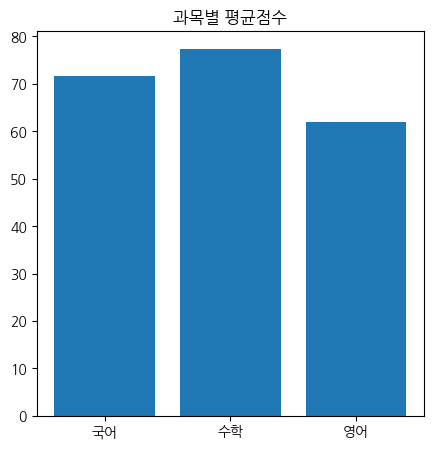

In [182]:
plt.figure(figsize=(5, 5))

plt.title('과목별 평균점수')
plt.bar(out_df_mean.index, out_df_mean)

plt.show()

In [ ]:
limit = IQR * 1.5
# - limit < 데이터 < + limit


# weather.csv 실습

## ① 데이터 가져오기 (모듈 세팅)

In [14]:
weather_df = pd.read_csv('/content/weather.csv', encoding='cp949')
weather_df

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...,...
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3


## ② 데이터 정보 확인

In [15]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [16]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


In [18]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [17]:
weather_df.info()
# non-null count에서 값의 갯수가 다른 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


## ③ 데이터 전처리

### 원하는 컬럼으로 index 지정하기

In [19]:
# '일시'칼럼으로 index 바꿔주기
weather_df = weather_df.set_index('일시')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


### datetime형태로 바꾸기

In [20]:
# pd.to_datetime
weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [21]:
# datetime으로 바꾸고 다시 info로 확인해보기
weather_df.info()
# DatetimeIndex라고 뜸

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


### 컬럼별 null값 갯수 세기

In [23]:
# 컬럼별 null값의 갯수 세기
weather_df.isnull().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

### boolean indexing

In [24]:
# sum()없이 isnull()까지만 하면 boolean 형태로 뜸
weather_df.isnull()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,False,False,False,False,False,False
2010-01-02,False,False,False,False,False,False
2010-01-03,False,False,False,False,False,False
2010-01-04,False,False,False,False,False,False
2010-01-05,False,False,False,False,False,False
...,...,...,...,...,...,...
2010-12-27,False,False,False,False,False,False
2010-12-28,False,False,False,False,False,False
2010-12-29,False,False,False,False,False,False


* boolean indexing
: 조건에 맞는 값만 시리즈 형태로 반환됨

In [26]:
# boolean -> boolean indexing
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [27]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [28]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [31]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [32]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isnull()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [33]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isnull()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

* 평균 풍속: 12월 7일~ 14일까지 null값
* 나머지: 12월 8일~ 13일까지 null값

### 결측값 위치를 날짜로 확인

* index를 날짜값으로 줬으니까 loc함수에 슬라이싱을 사용하여 해당 날짜만 데이터프레임으로 가져오기
* loc의 슬라이싱은 [A:B] A와 B 둘 다 포함하여 결과값을 반환함

In [36]:
# loc함수의 슬라이싱으로 해당 날짜 null값 확인해보기
weather_df.loc['2010-12-07':'2010-12-14']  # loc슬라이싱은 둘 다 포함하여 출력

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


### 결측치 처리하기

* 시계열 데이터 : 시간의 흐름에 따른 데이터
* 비어있는 값 앞 뒤로 데이터의 경향을 파악

In [38]:
# null값이 12월이니까 12월 한 달의 전체 데이터 경향 파악해보기
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


#### 일강수량 결측치를 0으로 채워주기
* 경향을 살펴보니 일강수량 null값의 전후가 0.0이라서 0으로 채워보기

In [39]:
# fillna(A) -> null값을 A로 채워줌
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
weather_df['일강수량(mm)'].isnull().sum()
# null값을 0으로 채워서 이제 null값이 0개로 뜸

0

#### 기온 데이터 (사분위수 사용)

In [40]:
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [42]:
# 사분위수값 확인하기
weather_df.describe()
# min, max, 25%, 50%, 75% 값 확인 가능

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,365.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.536986,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.711052,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.000000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [43]:
weather_df.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


* 위 표에서
* Q1 -> 25% 값
* Q2 -> 50% 값
* Q3 -> 75% 값

In [46]:
# 최저기온과 최고기온의 null값을 사분위수 50% 값으로 채워주기
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-10,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-11,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-12,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-13,0.4,2.9,0.0,NaN,NaN,NaN


#### 최대 순간 풍속 데이터 확인해보기

In [47]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN


* 최대 순간 풍속을 앞뒤 경향의 평균값으로 채워넣기

In [48]:
# 일정 기간의 평균값 확인해보기
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [50]:
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)
weather_df.loc['2010-12-06':'2010-12-15']  # 값이 잘 채워짐

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-09,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-10,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-11,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-12,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-13,0.4,2.9,0.0,24.1,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


#### 평균 풍속 데이터 확인

In [ ]:
weather_df.loc['2010-12-01':'2010-12-31']

* 전후 평균값으로 평균 풍속 null값 채워주기

In [52]:
weather_df.loc['2010-12-04':'2010-12-18'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.700000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.676933,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.100000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.100000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [53]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)

In [55]:
# 확인해보기
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.100000,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.900000,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.200000,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.900000,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.100000,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.600000,14.1
2010-12-07,0.4,2.0,0.0,20.6,4.642857,340.2
2010-12-08,0.4,2.9,0.0,24.1,4.642857,NaN
2010-12-09,0.4,2.9,0.0,24.1,4.642857,NaN


#### 최대 순간 풍속 풍향 데이터 확인
* 경향이 너무 복잡함 (왔다갔다)

In [56]:
weather_df.loc['2010-12-07':'2010-12-17'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [57]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.380000)
weather_df['최대 순간 풍속 풍향(hhmi)'].isnull().sum()

0

In [58]:
# info를 통해 null값이 있는지 다시 확인
weather_df.info()
# 365개로 null값이 없는 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## ④ 데이터 시각화

In [59]:
# 한글 출력을 위한 추가 라이브러리
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.7 MB/s eta 0:00:00


In [61]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [62]:
# x축과 y축 지정하기
x = weather_df.index  # 시간 순서
y1 = weather_df['최저기온(°C)']

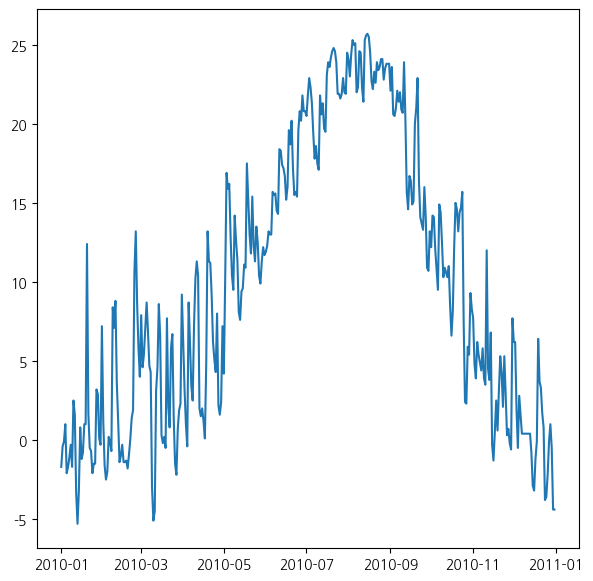

In [66]:
# 하나의 셀 안에 어떻게 출력할 것인지 적기

plt.figure(figsize=(7, 7))  # 그래프 사이즈
plt.plot(x, y1)  # 그래프 그리기 (기본 그래프인 plot 사용)
plt.show()  # 그래프 출력

In [68]:
# 여러 개 그래프 그리기
# 그래프 변수 지정
x = weather_df.index  # index는 '일시'값
y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

### subplots
* 여러 개의 그래프를 그릴 때 사용
```
plt.subplot(행, 열, 인덱스)
# 배열과 연관지어 생각해보기
```

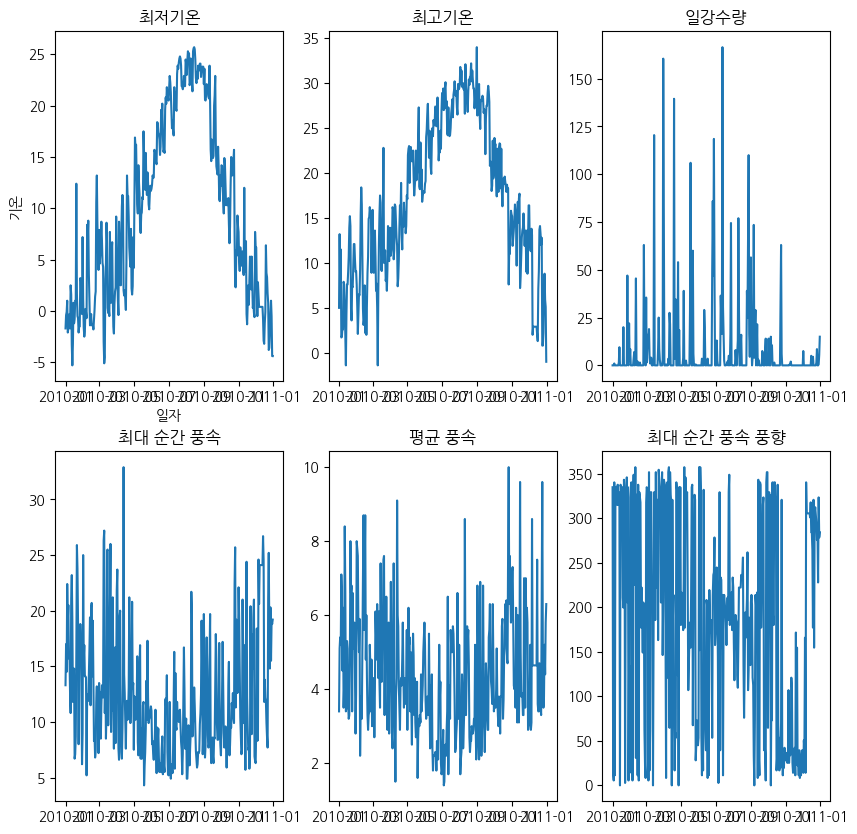

In [74]:
plt.figure(figsize=(10, 10))

# subplots : 여러 개 그릴 때 사용
# plt.subplot(행, 열, 인덱스)

plt.subplot(2, 3, 1)   # 2행 3열의 1번 인덱스값
plt.title('최저기온')  # 제목 넣기
plt.xlabel('일자')     # x축에 대한 제목(label)
plt.ylabel('기온')     # y축에 대한 제목(label)
plt.plot(x, y1)        # x와 y1을 가지고 그리겠다!

plt.subplot(2, 3, 2)   # 2행 3열의 2번 인덱스값
plt.title('최고기온')
plt.plot(x, y2)

plt.subplot(2, 3, 3)   # 2행 3열의 3번 인덱스값
plt.title('일강수량')
plt.plot(x, y3)

plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속')
plt.plot(x, y4)

plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.plot(x, y5)

plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향')
plt.plot(x, y6)

plt.show()   # 그래프 출력

### 월별로 그래프 그리기 : groupby
* 기준 데이터에서 (처리할) 수치 데이터를 고름
* 기준데이터 -> 월 별
* 수치 데이터 -> 기온, 풍속 ..

```
.groupby(기준이 될 데이터==그룹화 하고 싶은 데이터)
```

```
# 가져오고 싶은 데이터만 가져오기
.groupby(기준이 될 데이터)[원하는 컬럼].mean()
# 맨 뒤에는 평균, 합계 등등 사용 가능
```

In [75]:
weather_df.index  # DatetimeIndex 형태

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='일시', length=365, freq=None)

In [76]:
# 시리즈 형태로 변형
weather_date = pd.Series(weather_df.index)
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [78]:
# 월 데이터만 가져오기
weather_date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: 일시, Length: 365, dtype: int64

In [81]:
# 이렇게 시리즈를 그대로 넣으면 weather_date.dt.month의 index와 weather_df의 인덱스가 달라서
weather_df['월'] = weather_date.dt.month

In [82]:
# NaN값으로 들어감
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,NaN
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,NaN
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,NaN
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,NaN
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,NaN
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,NaN
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,NaN
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,NaN


In [83]:
# values값만 넣어주면 됨
weather_df['월'] = weather_date.dt.month.values

In [84]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [120]:
# groupby
# 월별 평균값 가져오기
month_low = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

In [121]:
month_high = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()

In [122]:
month_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()

In [123]:
month_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()

In [124]:
month_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()

In [125]:
month_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [126]:
x_month = weather_df['월'].unique()

* 월별 데이터로 그래프 그리기

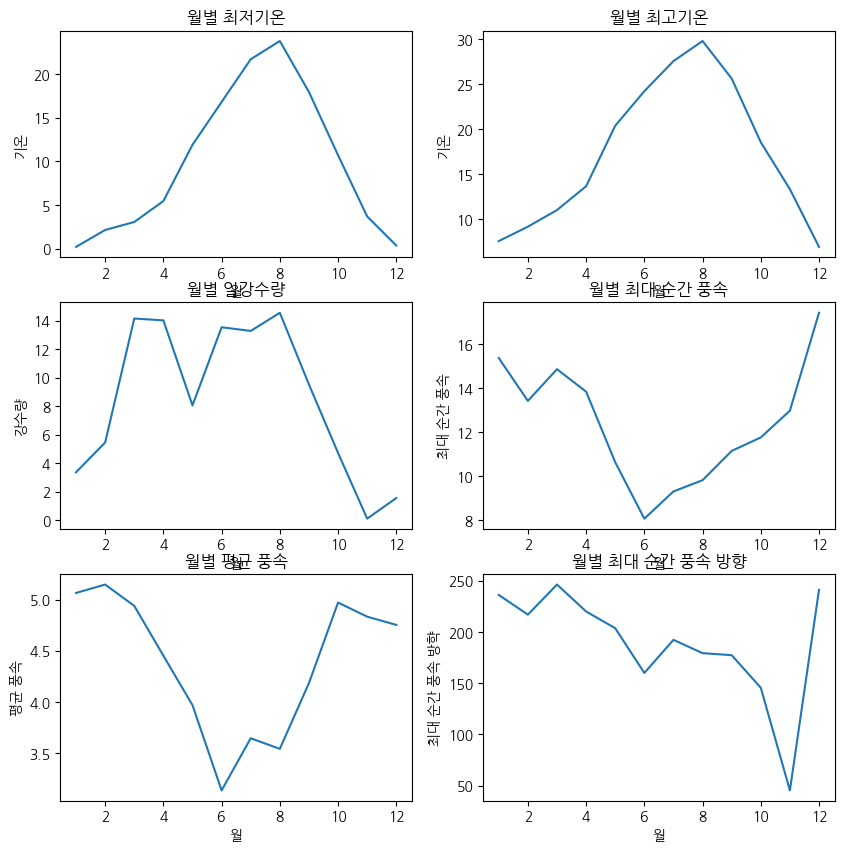

In [130]:
plt.figure(figsize=(10, 10))

# 1
plt.subplot(3, 2, 1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low)

# 2
plt.subplot(3, 2, 2)
plt.title('월별 최고기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_high)

# 3
plt.subplot(3, 2, 3)
plt.title('월별 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_vol)

# 4
plt.subplot(3, 2, 4)
plt.title('월별 최대 순간 풍속')
plt.ylabel('최대 순간 풍속')
plt.xlabel('월')
plt.plot(x_month, month_speed)

# 5
plt.subplot(3, 2, 5)
plt.title('월별 평균 풍속')
plt.ylabel('평균 풍속')
plt.xlabel('월')
plt.plot(x_month, month_mean)

# 6
plt.subplot(3, 2, 6)
plt.title('월별 최대 순간 풍속 방향')
plt.ylabel('최대 순간 풍속 방햑')
plt.xlabel('월')
plt.plot(x_month, month_dic)

plt.show()

### 1월만 그래프로 그리기

* 각 월별로 비교를 할 때는 groupby를 사용해서 월별로 모아서 비교를 함
* 1월 데이터만 가져와서 그래프로 그릴 때 -> groupby를 사용하지 않고 그냥 1월 데이터를 뽑아서 그래프로 그리면 됨(groupby를 사용할 필요가 없음)

In [144]:
# weather_df에서 월이 1인 데이터만 가져오기
month_1 = weather_df[weather_df['월'] == 1]
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


In [150]:
month_1.tail()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-27,3.2,12.1,47.0,18.8,5.3,205.3,1
2010-01-28,2.9,12.1,0.5,17.2,5.8,334.7,1
2010-01-29,0.1,10.3,0.0,12.2,4.4,5.5,1
2010-01-30,-0.3,9.0,22.0,6.2,2.8,135.0,1
2010-01-31,7.2,9.1,2.5,9.0,3.9,14.1,1


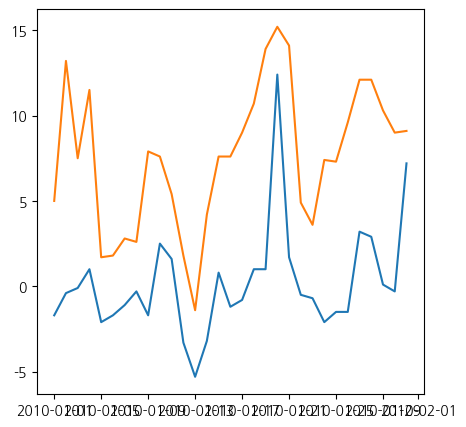

In [151]:
plt.figure(figsize=(5, 5))

plt.plot(month_1['최저기온(°C)'])
plt.plot(month_1['최고기온(°C)'])

plt.show()

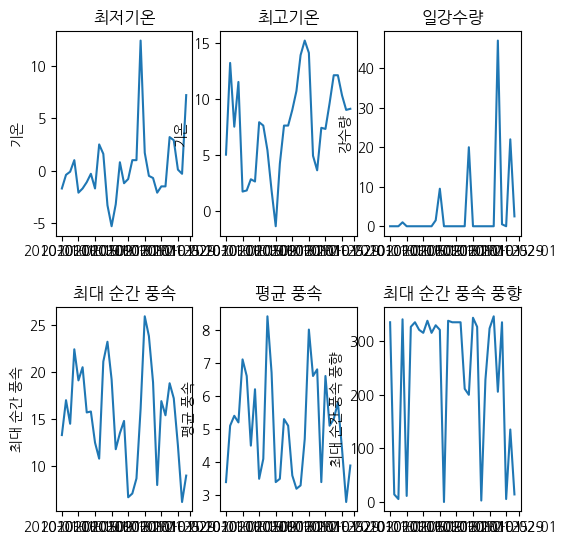

In [157]:
plt.figure(figsize= (6, 6))

# 간격 넓히기
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

# 1
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.ylabel('기온')
plt.plot(month_1['최저기온(°C)'])

# 2
plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.ylabel('기온')
plt.plot(month_1['최고기온(°C)'])

# 3
plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.ylabel('강수량')
plt.plot(month_1['일강수량(mm)'])

# 4
plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속')
plt.ylabel('최대 순간 풍속')
plt.plot(month_1['최대 순간 풍속(m/s)'])

# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.ylabel('평균 풍속')
plt.plot(month_1['평균 풍속(m/s)'])

# 6
plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향')
plt.ylabel('최대 순간 풍속 풍향')
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])

plt.show()

### 기온끼리 합쳐서 하나의 그래프로 그리기

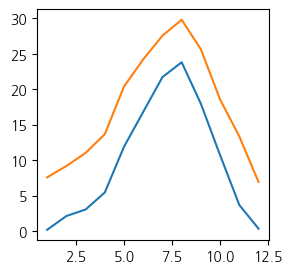

In [134]:
plt.figure(figsize=(3, 3))

# plt.plot을 두 번 쓰기
plt.plot(x_month, month_low)
plt.plot(x_month, month_high)

plt.show()

### 그래프 선
[ 선 모양 ]
* o : o 모양
* -- : dash line
* -. : dash dot
* :  : dot

[ 색상 ]
* r : red
* b : blue
* y : yellow
  etc ...

[ 혼합 ]
* or : o 모양의 red
* --b : dash line의 blue


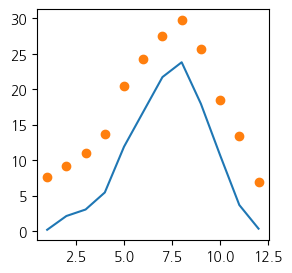

In [137]:
plt.figure(figsize=(3, 3))

plt.plot(x_month, month_low)
plt.plot(x_month, month_high, 'o')   # o 모양 - 색상 랜덤

plt.show()

### 범례
```
plt.plot(label='범례명')
```
[ 범례 위치 ]
- upper(left, rigth, center), center(left, rigth), lower(left, right) 등등

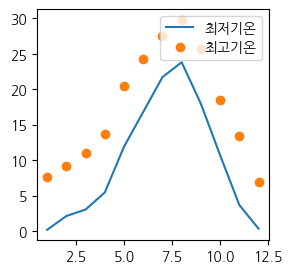

In [138]:
plt.figure(figsize=(3, 3))

plt.plot(x_month, month_low, label='최저기온')
plt.plot(x_month, month_high, 'o', label='최고기온')
plt.legend(loc='upper right')   # plt.plot안에 label명 설정 후 legend문 추가

plt.show()

### 다양한 그래프
* 데이터 타입에 따라 적절한 그래프 선택하기

#### 월별 일강수량을 바 그래프로 나타내기

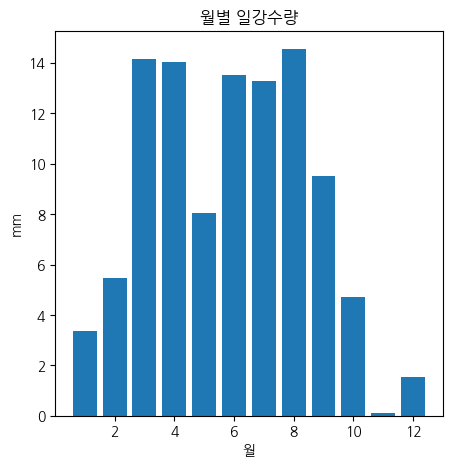

In [140]:
plt.figure(figsize=(5, 5))

plt.title('월별 일강수량')
plt.xlabel('월')
plt.ylabel('mm')
plt.bar(x_month, month_vol)   # plt.bar 그래프 사용

plt.show()

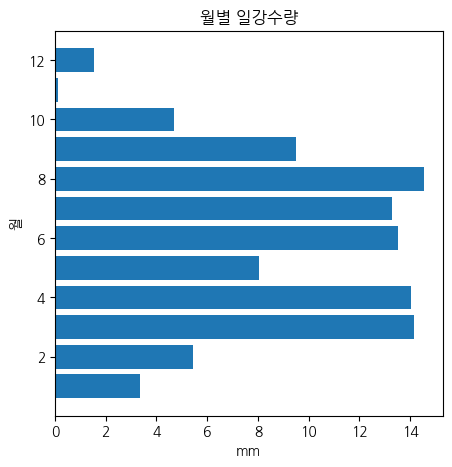

In [143]:
# 값이 길 때는 옆으로 눕히기
# barh로 눕힐 때는 label만 x,y값을 바꿔줘야함

plt.figure(figsize=(5, 5))

plt.title('월별 일강수량')
plt.xlabel('mm')
plt.ylabel('월')
plt.barh(x_month, month_vol)   # plt.barh 그래프 사용

plt.show()

# jeju_food.xlsx 실습

* 강사님이 보내주신 jeju_food.xlsx 파일 사용

## ① 데이터 가져오기 (모듈 세팅)

In [183]:
import pandas as pd

In [184]:
food = pd.read_excel('/content/jeju_food.xlsx')

## ② 데이터 확인하기

In [185]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [186]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


In [187]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [188]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [189]:
# isnull로 한 번 더 결측치 확인
food.isnull().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

## ③ 데이터 전처리

#### 광역시/도 컬럼 삭제하기
* 불필요한 컬럼 삭제

In [192]:
food = food.drop('광역시/도', axis=1)  # axis=1 : 열
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


* 중분류 카테고리를 삭제하기 전에 unique를 통해 값 확인하기

In [193]:
food['중분류 카테고리'].unique()
# '음식'값만 들어있는 것 확인

array(['음식'], dtype=object)

In [194]:
food = food.drop('중분류 카테고리', axis=1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


#### value_counts()

In [198]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [199]:
food['시/군/구'].value_counts()

제주시     309
서귀포시    191
Name: 시/군/구, dtype: int64

### index 설정

In [200]:
food = food.set_index('순위')
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [205]:
# food - 카테고리가 한식인 데이터 뽑아보기
food[food['소분류 카테고리'] == '한식']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [206]:
# 한식만 상위 10개를 가져온다면?
food[food['소분류 카테고리'] == '한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [213]:
# 카페/찻집 데이터만 가져오기
food[food['소분류 카테고리']=='카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [214]:
food[food['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [217]:
cafe = food[food['소분류 카테고리']=='카페/찻집']
cafe[cafe['관광지명'].str.contains('스타벅스')].describe()

,검색건수
count,23.000000
mean,14532.173913
std,9023.124810
min,4427.000000
25%,8486.500000
50%,12585.000000
75%,20673.000000
max,31720.000000


In [221]:
# 카테고리가 '한식'이면서
# 가게명에 '국수'가 들어가는 곳 찾아보기
k_food = food[food['소분류 카테고리'] == '한식']
k_food[k_food['관광지명'].str.contains('국수')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


## ④ 데이터 시각화

### 다른 그래프로 표현하기

- pie graph: 각 범

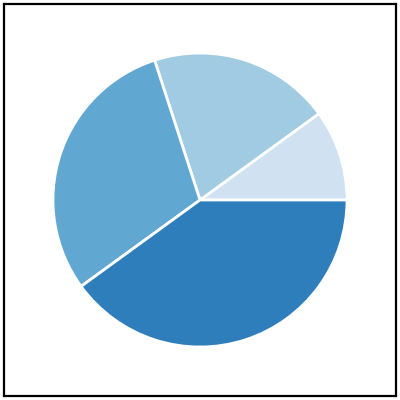

In [ ]:
# pie graph
# plt.pie(비율(ratio), 레이블)

In [ ]:
pie = food['소분류 카테고리'].value_counts()
pie.values # 비율로 바꾸기

array([210, 152,  74,  49,  12,   3])

In [ ]:
# list 값에 대한 계산을 할때는 리스트 컴프리핸션 이용하는 걸 권장
# 순회 가능한 계산이 필요할 때 -> 리스트 컴프리핸션

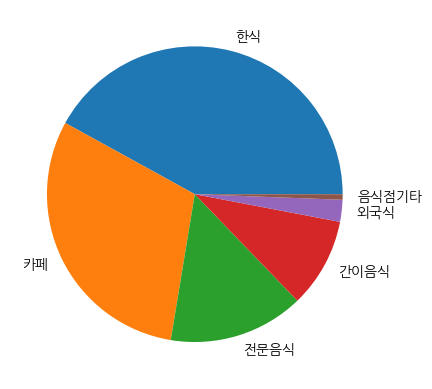

In [ ]:
labels = ['한식', '카페', '전문음식', '간이음식', '외국식', '음식점기타']
plt.pie(pie.values, labels=labels, autopct='%.1f%%') # 함승주님 코드
plt.show()